# ***Genie Talk Internship Task (Where's my wine challenge)***

# ***YoloV5 custom object detection***

Firstly used a YoloV5 model for object detection on custom dataset. I have 300 images of grapes and 300 labels of image's annotation.
Then i create a structure of my dataset like this.


images:

  train: 245 images   
  val: 65 images

labels:

  train: 245 labels 
  val: 65 labels  



then i cloned YoloV5 github library into colab.

coco128.yml file setting:

train: /content/Data/images/train

val: /content/Data/images/val

#number of classes
nc: 1

#class names
names: ['Grapes']


then i started training for 70 epochs and i check the actual image and the predicted image. And test my trained model on custom images but i failed
to detect grapes on custom image. So i thought there is a problem with image's annotation. So i did annotate on my all 300 images using this website (app.roboflow.com).
then where my dataset structure implemented like this :

images:

  train: 245 images   
  val: 65 images

labels:

  train: 245 labels 
  val: 65 labels 


then i trained again my YoloV5 object detection model on my new dataset which i prepared for 70 epochs. Then i check my actual and predicted image.
Then i tested my model on custom grapes image dataset and i saw the result So i got very good result. My model detect all grapes accurately. And i trained on another 
custom grapes image dataset and i saw another result So i got very good result. My model detect all grapes. And i tested my model on custom grapes video dataset and i saw the result So i got 
very good result in my tested video. My model detect all grapes accurately in video.



# ***Importing all required libraries***

In [1]:
import os
import shutil 

# ***Copy data from drive***

In [6]:
shutil.copy2("/content/drive/MyDrive/Data.zip","Grapes.zip")

'Grapes.zip'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Unziping data***

In [7]:
!unzip /content/Grapes.zip

Archive:  /content/Grapes.zip
   creating: Data/
   creating: Data/images/
   creating: Data/images/train/
  inflating: Data/images/train/CDY_2015_jpg.rf.7e1c291d5e9f2c4f3baa8099a9fb63ab.jpg  
  inflating: Data/images/train/CDY_2016_jpg.rf.9b3724f70cbe30d6b6c61d396528e985.jpg  
  inflating: Data/images/train/CDY_2017_jpg.rf.ce1f2bb81af6df268606b036e0990794.jpg  
  inflating: Data/images/train/CDY_2018_jpg.rf.cf73565a759554995374c60f3bb3f590.jpg  
  inflating: Data/images/train/CDY_2019_jpg.rf.0069a4b47e68458f7e43b4ea5a931c12.jpg  
  inflating: Data/images/train/CDY_2020_jpg.rf.473d7cdc6cdcdf9e25bda4dfd68e1793.jpg  
  inflating: Data/images/train/CDY_2021_jpg.rf.57695ac2ab547da7d962f391a10634e4.jpg  
  inflating: Data/images/train/CDY_2022_jpg.rf.33e6919c53ffeef2009f8ab36d51b3c9.jpg  
  inflating: Data/images/train/CDY_2023_jpg.rf.41d1e876fd71b9a83f3815c8f273ddc6.jpg  
  inflating: Data/images/train/CDY_2024_jpg.rf.640b3a72989b1cf614184ce209f96495.jpg  
  inflating: Data/images/train/CD

# ***Clone YoloV5 library***

In [8]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# ***Train YoloV5 model on custom object detection for 70 epochs (Grapes)***

coco128.yaml file setting

train: /content/Data/images/train  
val: /content/Data/images/val 

# number of classes
nc: 1

# class names
names: [ 'Grapes']

In [10]:
!python train.py --img 640 --batch 4 --epochs 70 --data coco128.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-48-g955eea8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=70, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-30 07:48:19.083699: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynam

# ***Actual image***

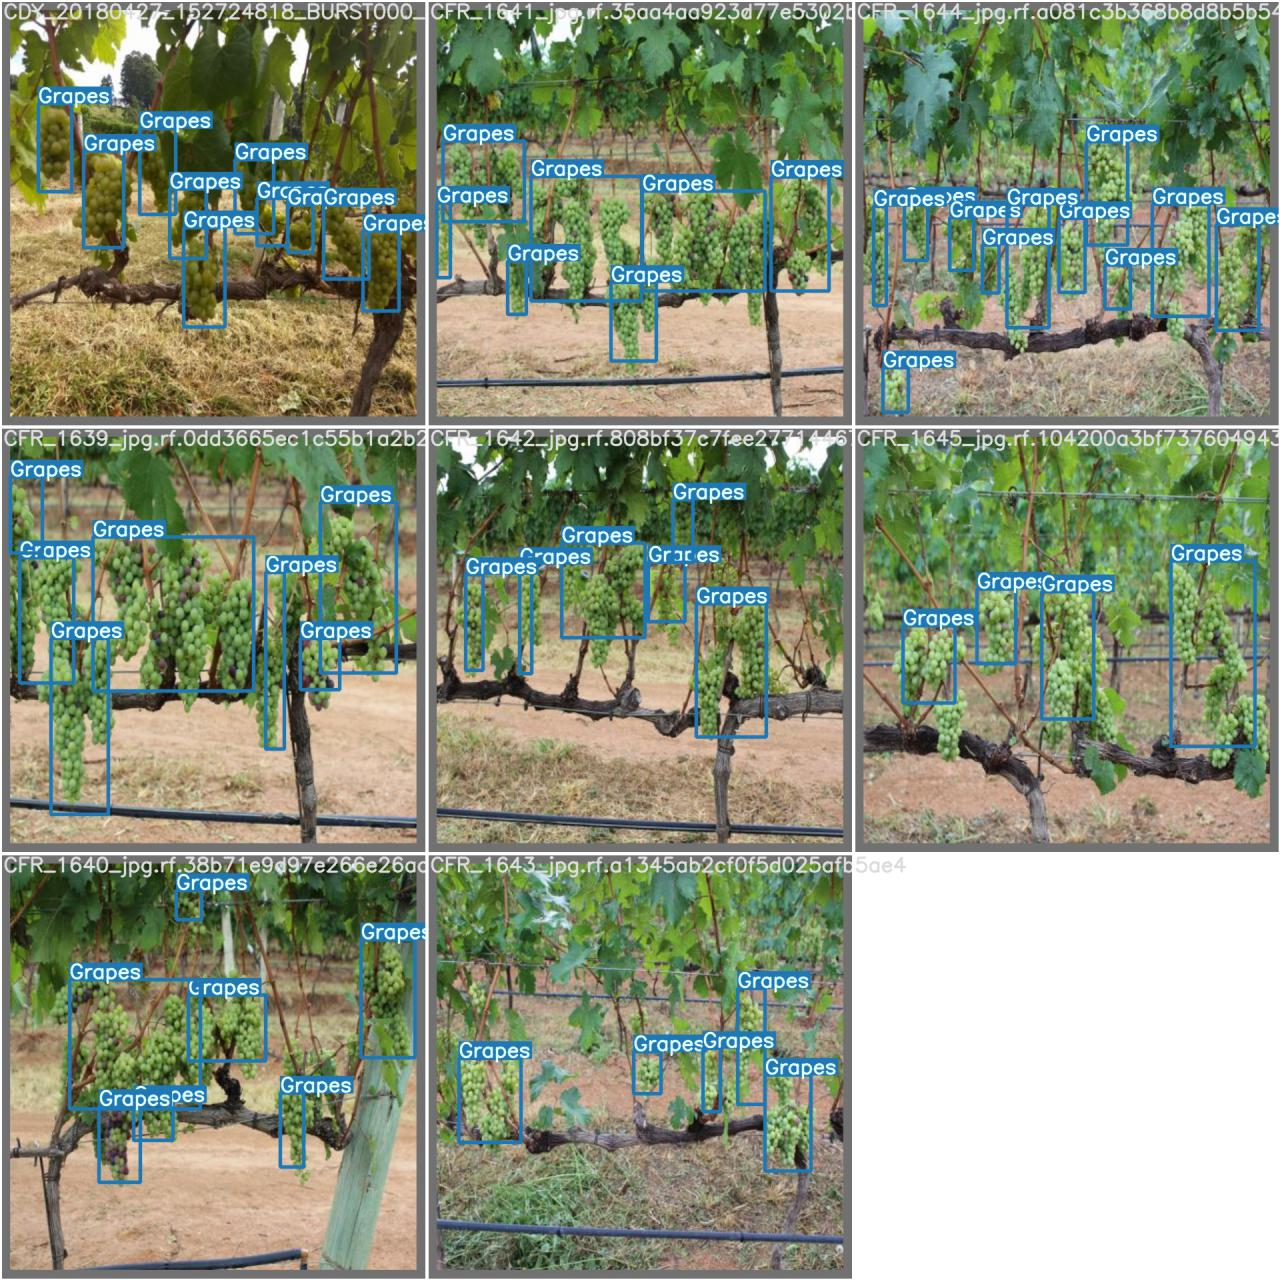

In [11]:
Image(filename='/content/yolov5/runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels (Original train image)

# ***predicted image***

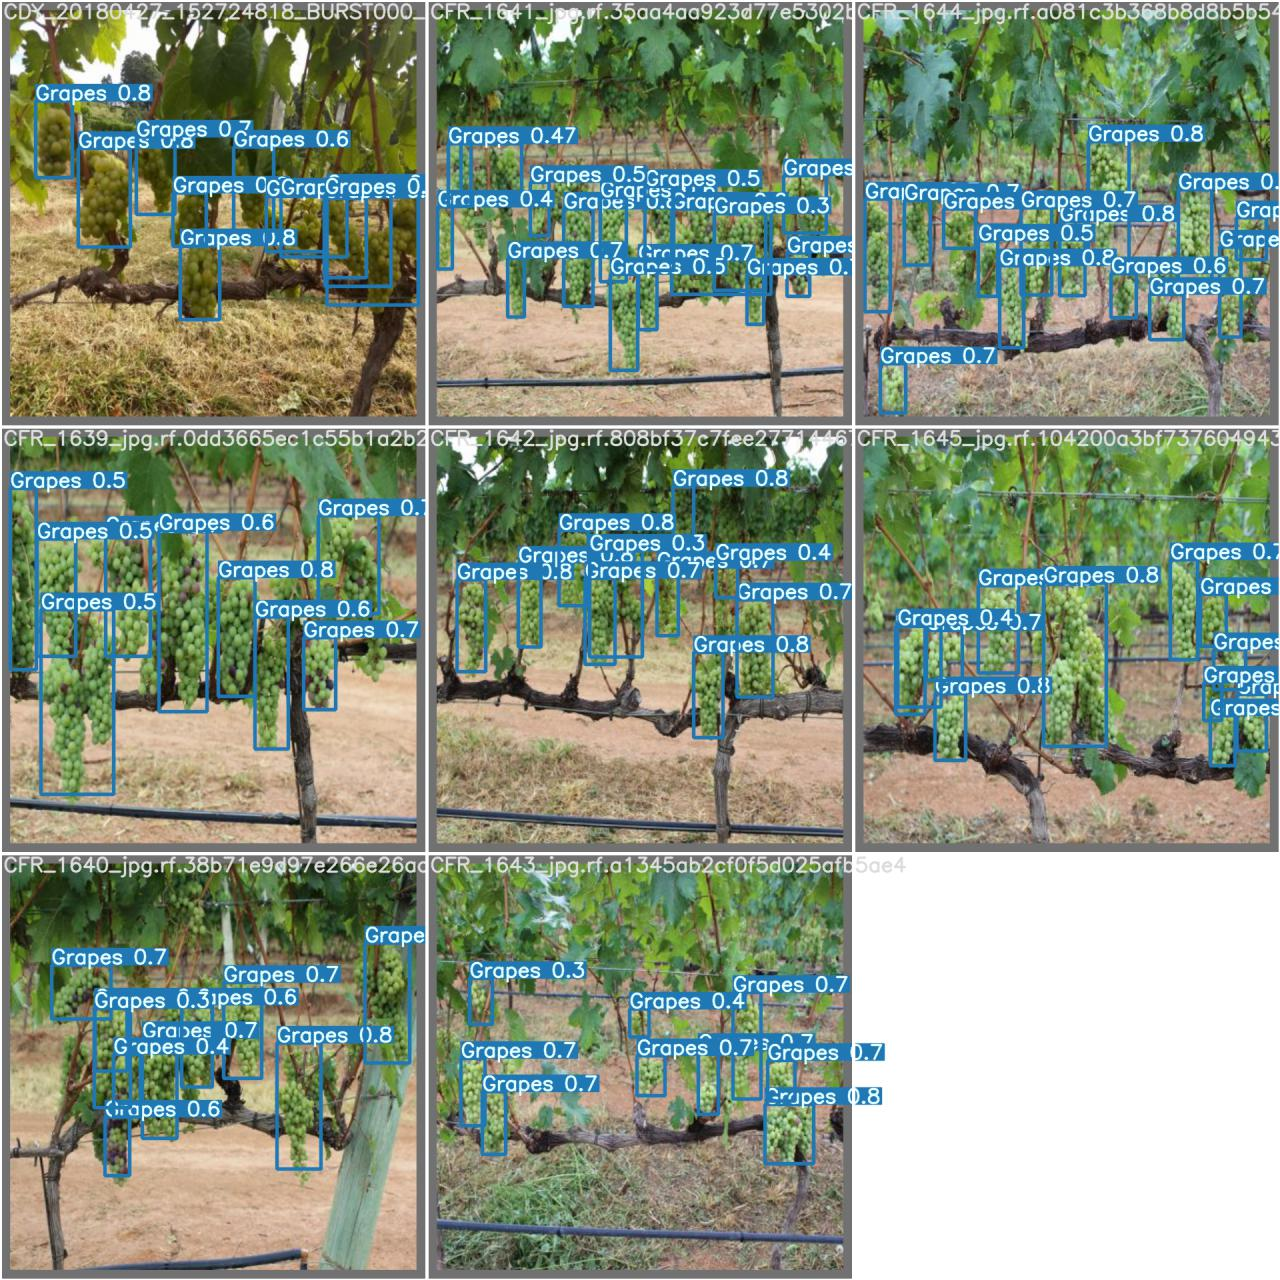

In [12]:
Image(filename='/content/yolov5/runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions (Predicted image)

# ***Test YoloV5 custom object detection model on another custom data***

In [15]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/last.pt' --img 640 --conf 0.25 --source /content/green-grapes.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/green-grapes.jpg', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp2/weights/last.pt'])
YOLOv5 🚀 v5.0-48-g955eea8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/green-grapes.jpg: 480x640 9 Grapess, Done. (0.011s)
Results saved to runs/detect/exp2
Done. (0.101s)


# ***Showing Result***

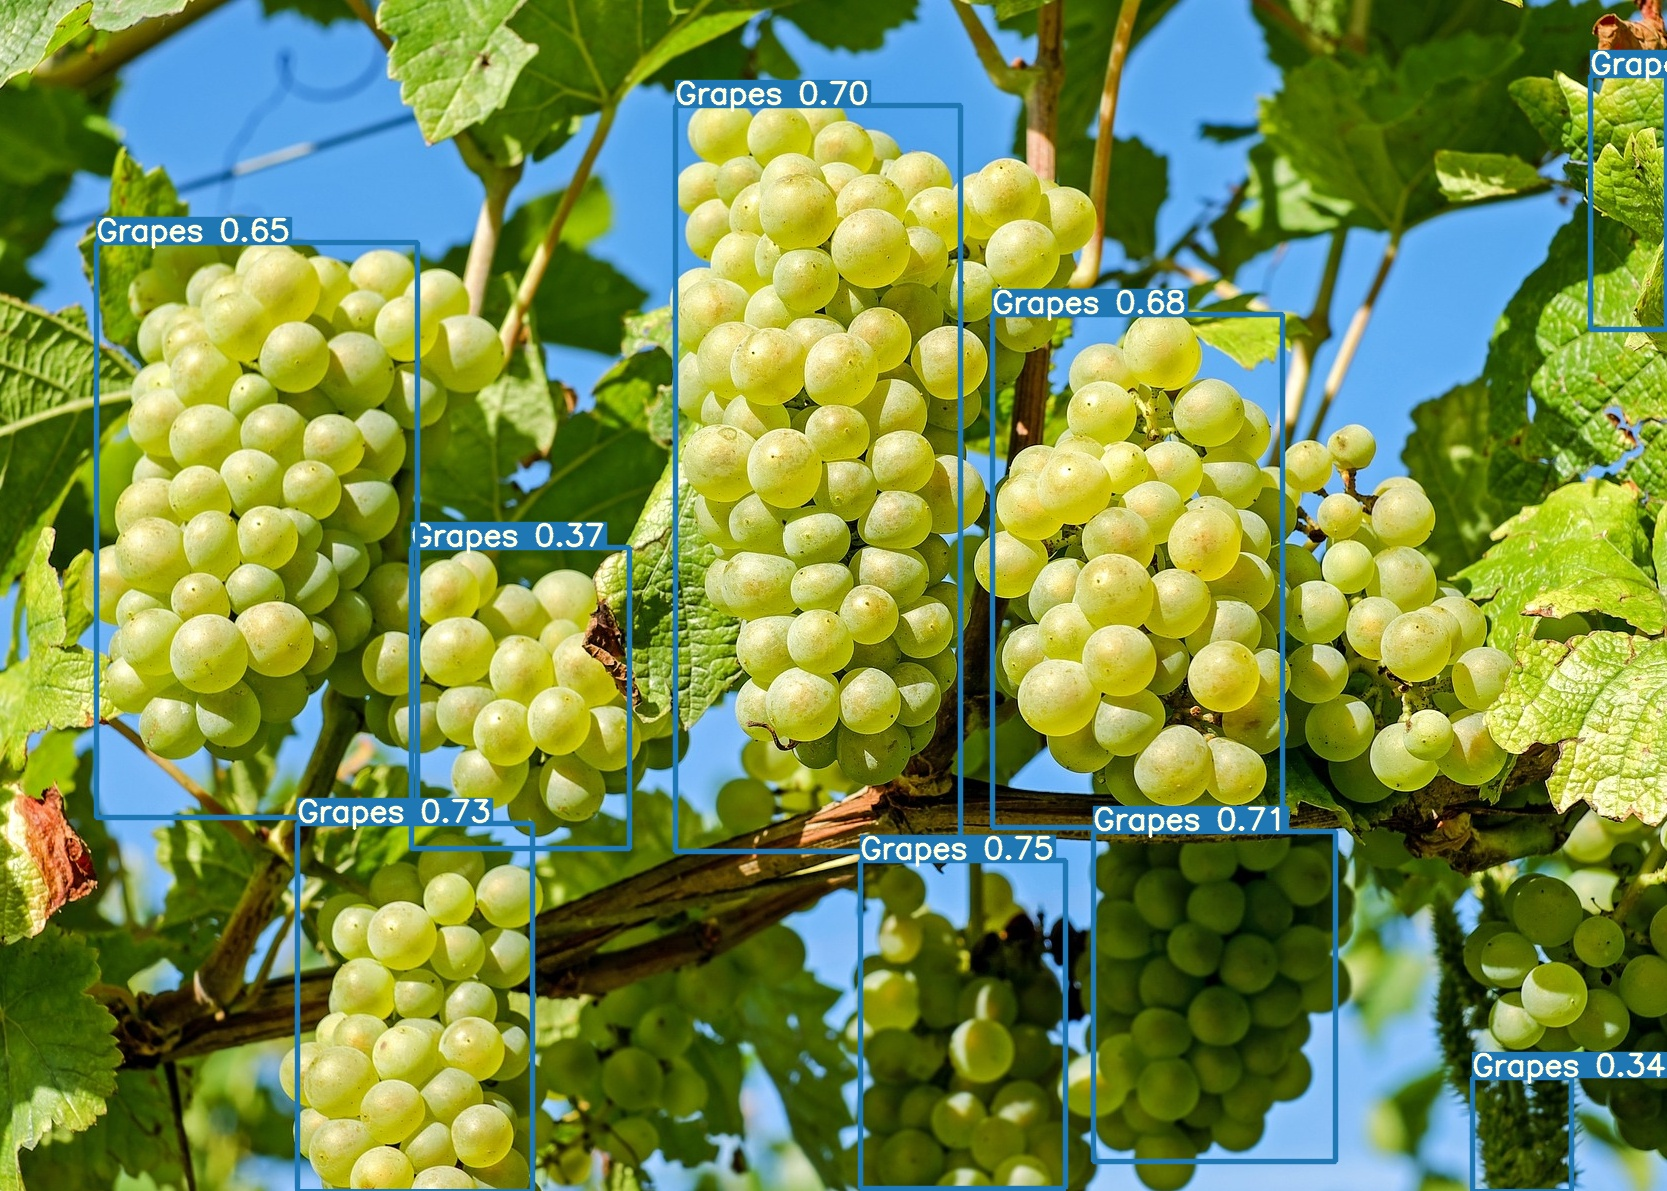

In [16]:
Image(filename='/content/yolov5/runs/detect/exp2/green-grapes.jpg', width=800)  # test batch 0 predictions (Predicted image)

# ***Test YoloV5 custom object detection model on another custom data***

## ***importing libraries for download video***

In [18]:
import os
from moviepy.editor import *
!pip install pytube

## ***Checking current working directory***

In [19]:
pwd

'/content/yolov5'

## ***Download grapes's video for test my model on video using pytube module***

In [20]:
# download videos of each category one by one
from pytube import YouTube 
    
  # link of the video to be downloaded 
link="https://youtu.be/BNl3R8PagJg"
 
yt = YouTube(link)
filters = yt.streams.filter(progressive=True, file_extension='mp4') 

d_video = filters.get_lowest_resolution() 
d_video.download() 

print('Task Completed!')

Task Completed!


## ***Trim video for 10 seconds***

In [21]:
# trim video
clip = VideoFileClip("/content/yolov5/15 साल तक होगी मालामाल कमाई🍇🍇Profit Marketing Variety Harvesting  Grapes Farming A to Z.mp4") 
clip = clip.subclip(5,15) 
clip.write_videofile("Grapes.mp4")

[MoviePy] >>>> Building video Grapes.mp4
[MoviePy] Writing audio in GrapesTEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 826.95it/s]

[MoviePy] Done.
[MoviePy] Writing video Grapes.mp4



100%|█████████▉| 300/301 [00:04<00:00, 71.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Grapes.mp4 



## ***Test YoloV5 custom object detection model on another custom data***

In [22]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/last.pt' --img 640 --conf 0.25 --source /content/yolov5/Grapes.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/yolov5/Grapes.mp4', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp2/weights/last.pt'])
YOLOv5 🚀 v5.0-48-g955eea8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
video 1/1 (1/300) /content/yolov5/Grapes.mp4: 384x640 2 Grapess, Done. (0.011s)
video 1/1 (2/300) /content/yolov5/Grapes.mp4: 384x640 1 Grapes, Done. (0.010s)
video 1/1 (3/300) /content/yolov5/Grapes.mp4: 384x640 2 Grapess, Done. (0.009s)
video 1/1 (4/300) /content/yolov5/Grapes.mp4: 384x640 2 Grapess, Done. (0.009s)
video 1/1 (5/300) /content/yolov5/Grapes.mp4: 384x640 2 Grapess, Done. (0.009s)
video 1/1 (6/300) /con

# ***Thanks***